## Basic 2x1 XOR Problem Neural Network with Pytorch

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

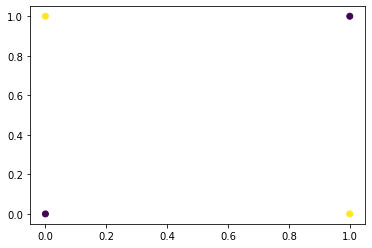

In [6]:
x1 = np.array([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array([0., 1., 0., 1.], dtype = np.float32)
y  = np.array([0., 1., 1., 0. ],dtype = np.float32)
plt.scatter(x1, x2, c=y)

In [8]:
def create_dataset(x1, x2, y):
  # Repeat the numbers from x1, x2, and y 50 times
  x1 = np.repeat(x1, 50)
  x2 = np.repeat(x2, 50)
  y =  np.repeat(y,  50)

  # Add noise to data points just to have some data variety
  x1 = x1 + np.random.rand(x1.shape[0])*0.05
  x2 = x2 + np.random.rand(x2.shape[0])*0.05

  # Shuffle
  index_shuffle = np.arange(x1.shape[0])
  np.random.shuffle(index_shuffle)

  x1 = x1.astype(np.float32)
  x2 = x2.astype(np.float32)
  y  = y.astype(np.float32)

  x1 = x1[index_shuffle]
  x2 = x2[index_shuffle]
  y  = y [index_shuffle]

  # Convert data to tensors
  x1_torch = torch.from_numpy(x1).clone().view(-1, 1)
  x2_torch = torch.from_numpy(x2).clone().view(-1, 1)
  y_torch = torch.from_numpy(y).clone().view(-1, 1)

  # Combine X1 and X2
  X = torch.hstack([x1_torch, x2_torch])


  # Split into training and testing
  X_train = X[:150,:]
  X_test  = X[150:,:]
  y_train = y_torch[:150,:]
  y_test  = y_torch[150:,:]

  return X_train, y_train, X_test, y_test

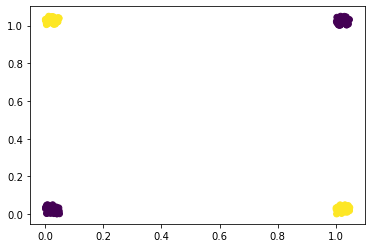

In [9]:
X_train, y_train, X_test, y_test = create_dataset(x1, x2, y)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

Basic network implementation using Pytorch convention:

In [24]:
class XOR(nn.Module):
    def __init__(self):        
        super(XOR, self).__init__()        
        self.linear = nn.Linear(2, 2)        
        self.Sigmoid = nn.Sigmoid()        
        self.linear2 = nn.Linear(2, 1)
    def forward(self, input):        
        x = self.linear(input)       
        sig = self.Sigmoid(x)        
        yh = self.linear2(sig)        
        return yh

In [25]:
xor_network = XOR()

Running for 1000 epochs using Mean Square Error, and the Adam optimizer. Plotting every 50 epochs. 

In [27]:
epochs = 1000
mseloss = nn.MSELoss()
optimizer = torch.optim.Adam(xor_network.parameters(), lr = 0.03)
all_losses = []
current_loss = 0
plot_every = 50
Xs = X_train
y = y_train
for epoch in range(epochs):

  # input training example and return the prediction
  yhat = xor_network.forward(Xs)

  # calculate MSE loss
  loss = mseloss(yhat, y)
  
  # backpropogate through the loss gradiants
  loss.backward()

  # update model weights
  optimizer.step()

  # remove current gradients for next iteration
  optimizer.zero_grad()

  # append to loss
  current_loss += loss
  if epoch % plot_every == 0:
      all_losses.append(current_loss / plot_every)
      current_loss = 0
  
  # print progress
  if epoch % 500 == 0:
    print(f'Epoch: {epoch} completed')

Epoch: 0 completed
Epoch: 500 completed


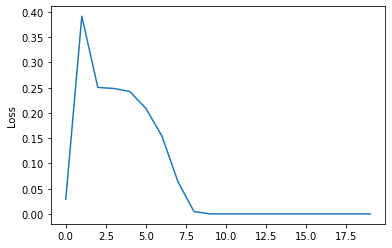

In [29]:
plt.plot(all_losses)
plt.ylabel('Loss')
plt.show()

In [30]:
# show weights and bias
for name, param in xor_network.named_parameters():
    if param.requires_grad:
        print(name, param.data)

linear.weight tensor([[ 4.0106, -4.0474],
        [-5.4175,  5.5472]])
linear.bias tensor([-2.0359, -3.3383])
linear2.weight tensor([[1.3740, 1.3317]])
linear2.bias tensor([-0.2058])


In [31]:
# test input
input = torch.tensor([1., 1.])
out = xor_network(input)
print(out.round())

tensor([-0.], grad_fn=<RoundBackward>)
